# Homework 04. Jeun Hyun (Student ID -20191328)


In [27]:
# Collect CoV N proteins (SARS, MERS, SARS-CoV) - Select the representative sequences.
# Try both DNA and protein sequences.

In [28]:
# The function to read sequences from a FASTA file
def read_fasta(tmp_filename):
    rv = dict()
    f = open(tmp_filename, 'r')
    for line in f:
        if line.startswith('>'):
            tmp_h = line.strip().lstrip('>')
            rv[tmp_h] = ''
        else:
            rv[tmp_h] += line.strip().replace(' ', '')
    f.close()
    return rv

In [29]:
# Read GCF_009858895.2 genomic info.
filename_genomes = '../data/GCF_009858895.2_ASM985889v3_genomic.fna'
genome_list = read_fasta(filename_genomes)
genome_seq = list(genome_list.values())[0]

In [30]:
# Make N-protein cDNA sequence.
f = open('../data/GCF_009858895.2_ASM985889v3_genomic.gff', 'r')

for line in f:
    try:
        if 'Name=N' in line.split()[8]:
            N_genomic = genome_seq[int(line.split()[3])-1 : int(line.split()[4])]
            print('N-protein cDNA sequence is', N_genomic[:25], '...', N_genomic[-25:])
    except:
        continue
        
f.close()

N-protein cDNA sequence is ATGTCTGATAATGGACCCCAAAATC ... CAGTGCTGACTCAACTCAGGCCTAA


In [31]:
# Translate it to protein sequence. 
f = open("N_genomic.fa", 'w')
data = "> N_genomic\n%s\n" % N_genomic
f.write(data)
f.close()

# (terminal) ~/git/BME203-2020$ transeq --sequence ./04_Phylogeny/N_genomic.fa --outseq ./04_Phylogeny/N_trans.fa

N_protein = list(read_fasta('N_trans.fa').values())[0][:-1] # exclude not-designated codon - stop codon
print('N-protein sequence is', N_protein[:25], '...', N_protein[-25:]) 

N-protein sequence is MSDNGPQNQRNAPRITFGGPSDSTG ... LPAADLDDFSKQLQQSMSSADSTQA


In [32]:
# SARS-CoV2 genomes (03_27).
# Extract N_protein
# in cDNA
# (terminal) ~/git/BME203-2020$ makeblastdb -dbtype nucl -in ./data/2019nCoV_genomes.2020_03_27.fa -out ./data/2019nCoV_genomes.2020_03_27
# (terminal) ~/git/BME203-2020$ blastn -db ./data/2019nCoV_genomes.2020_03_27 -query ./04_Phylogeny/N_genomic.fa -outfmt 6 -out ./04_Phylogeny/2019nCoV_genomes.2020_03_27_blastn.out
g = open("SARS_CoV_N_protein_cDNA_list.fa", 'w')
f = open('2019nCoV_genomes.2020_03_27_blastn.out', 'r')

genome_list = read_fasta('../data/2019nCoV_genomes.2020_03_27.fa')
for line in f:
    for genome in list(genome_list.keys()):
        if line.split()[1] in genome:
            data = "> %s\n%s\n" % (genome.split()[0], genome_list[genome][int(line.split()[8])-1:int(line.split()[9])])
            g.write(data)

f.close()
g.close()
# Align the sequences(adding gaps to adjust the sequences to the same length)
# (terminal) ~/git/BME203-2020$ muscle -in ./04_Phylogeny/SARS_CoV_N_protein_cDNA_list.fa -out ./04_Phylogeny/SARS_CoV_N_protein_cDNA_list_muscle.fa
# Sort out the identical sequences, choose representatives
SARS_CoV_cDNA = read_fasta('SARS_CoV_N_protein_cDNA_list_muscle.fa')
SARS_CoV_cDNA_h = list(SARS_CoV_cDNA.keys())
SARS_CoV_cDNA_seq = list(SARS_CoV_cDNA.values())
SARS_CoV_cDNA_representatives= {}
for i in range(len(SARS_CoV_cDNA_h)):
    if SARS_CoV_cDNA_seq[i] not in SARS_CoV_cDNA_representatives.values():
        SARS_CoV_cDNA_representatives[SARS_CoV_cDNA_h[i]] = SARS_CoV_cDNA_seq[i]

h = open("SARS_CoV_cDNA_representatives.fa", 'w')
for genome in SARS_CoV_cDNA_representatives.keys():
    data = "> %s\n%s\n" % (genome, SARS_CoV_cDNA_representatives[genome])
    h.write(data)

h.close()


# in protein
# (terminal) ~/git/BME203-2020$ transeq --sequence ./data/2019nCoV_genomes.2020_03_27.fa --outseq ./data/2019nCoV_genomes.2020_03_27_trans6.fa -frame 6
# (terminal) ~/git/BME203-2020$ makeblastdb -dbtype prot -in ./data/2019nCoV_genomes.2020_03_27_trans6.fa -out ./data/2019nCoV_genomes.2020_03_27_trans6
# (terminal) ~/git/BME203-2020$ blastp -db ./data/2019nCoV_genomes.2020_03_27_trans6 -query ./04_Phylogeny/N_trans.fa -outfmt 6 -out ./04_Phylogeny/2019nCoV_genomes.2020_03_27_trans6_blastp.out
g = open("SARS_CoV_N_protein_protSeq_list.fa", 'w')
f = open('2019nCoV_genomes.2020_03_27_trans6_blastp.out', 'r')

genome_list = read_fasta('../data/2019nCoV_genomes.2020_03_27_trans6.fa')
for line in f:
    for genome in list(genome_list.keys()):
        if line.split()[1] in genome:
            data = "> %s\n%s\n" % (genome.split()[0], genome_list[genome][int(line.split()[8])-1:int(line.split()[9])])
            g.write(data)

f.close()
g.close()
# Align the sequences(adding gaps to adjust the sequences to the same length)
# (terminal) ~/git/BME203-2020$ muscle -in ./04_Phylogeny/SARS_CoV_N_protein_protSeq_list.fa -out ./04_Phylogeny/SARS_CoV_N_protein_protSeq_list_muscle.fa
# Sort out the identical sequences, choose representatives
SARS_CoV_protSeq = read_fasta('SARS_CoV_N_protein_protSeq_list_muscle.fa')
SARS_CoV_protSeq_h = list(SARS_CoV_protSeq.keys())
SARS_CoV_protSeq_seq = list(SARS_CoV_protSeq.values())
SARS_CoV_protSeq_representatives= {}
for i in range(len(SARS_CoV_protSeq_h)):
    if SARS_CoV_protSeq_seq[i] not in SARS_CoV_protSeq_representatives.values():
        SARS_CoV_protSeq_representatives[SARS_CoV_protSeq_h[i]] = SARS_CoV_protSeq_seq[i]

h = open("SARS_CoV_protSeq_representatives.fa", 'w')
for genome in SARS_CoV_protSeq_representatives.keys():
    data = "> %s\n%s\n" % (genome, SARS_CoV_protSeq_representatives[genome])
    h.write(data)

h.close()



In [33]:
# SARS
# Extract N_protein
# in cDNA
# (terminal) ~/git/BME203-2020$ makeblastdb -dbtype nucl -in ./data/SARS_genomes.2020_02_03.fa -out ./data/SARS_genomes.2020_02_03
# (terminal) ~/git/BME203-2020$ blastn -db ./data/SARS_genomes.2020_02_03 -query ./04_Phylogeny/N_genomic.fa -outfmt 6 -out ./04_Phylogeny/SARS_genomes.2020_02_03_blastn.out
g = open("SARS_N_protein_cDNA_list.fa", 'w')
f = open('SARS_genomes.2020_02_03_blastn.out', 'r')

genome_list = read_fasta('../data/SARS_genomes.2020_02_03.fa')
for line in f:
    for genome in list(genome_list.keys()):
        if line.split()[1] in genome:
            data = "> %s\n%s\n" % (genome.split()[0], genome_list[genome][int(line.split()[8])-1:int(line.split()[9])])
            g.write(data)

f.close()
g.close()
# Align the sequences(adding gaps to adjust the sequences to the same length)
# (terminal) ~/git/BME203-2020$ muscle -in ./04_Phylogeny/SARS_N_protein_cDNA_list.fa -out ./04_Phylogeny/SARS_N_protein_cDNA_list_muscle.fa
# Sort out the identical sequences, choose representatives
SARS_cDNA = read_fasta('SARS_N_protein_cDNA_list_muscle.fa')
SARS_cDNA_h = list(SARS_cDNA.keys())
SARS_cDNA_seq = list(SARS_cDNA.values())
SARS_cDNA_representatives= {}
for i in range(len(SARS_cDNA_h)):
    if SARS_cDNA_seq[i] not in SARS_cDNA_representatives.values():
        SARS_cDNA_representatives[SARS_cDNA_h[i]] = SARS_cDNA_seq[i]

h = open("SARS_cDNA_representatives.fa", 'w')
for genome in SARS_cDNA_representatives.keys():
    data = "> %s\n%s\n" % (genome, SARS_cDNA_representatives[genome])
    h.write(data)

h.close()


# in protein
# (terminal) ~/git/BME203-2020$ transeq --sequence ./data/SARS_genomes.2020_02_03.fa --outseq ./data/SARS_genomes.2020_02_03_trans6.fa -frame 6
# (terminal) ~/git/BME203-2020$ makeblastdb -dbtype prot -in ./data/SARS_genomes.2020_02_03_trans6.fa -out ./data/SARS_genomes.2020_02_03_trans6
# (terminal) ~/git/BME203-2020$ blastp -db ./data/SARS_genomes.2020_02_03_trans6 -query ./04_Phylogeny/N_trans.fa -outfmt 6 -out ./04_Phylogeny/SARS_genomes.2020_02_03_trans6_blastp.out
g = open("SARS_N_protein_protSeq_list.fa", 'w')
f = open('SARS_genomes.2020_02_03_trans6_blastp.out', 'r')

genome_list = read_fasta('../data/SARS_genomes.2020_02_03_trans6.fa')
for line in f:
    for genome in list(genome_list.keys()):
        if line.split()[1] in genome:
            data = "> %s\n%s\n" % (genome.split()[0], genome_list[genome][int(line.split()[8])-1:int(line.split()[9])])
            g.write(data)

f.close()
g.close()
# Align the sequences(adding gaps to adjust the sequences to the same length)
# (terminal) ~/git/BME203-2020$ muscle -in ./04_Phylogeny/SARS_N_protein_protSeq_list.fa -out ./04_Phylogeny/SARS_N_protein_protSeq_list_muscle.fa
# Sort out the identical sequences, choose representatives
SARS_protSeq = read_fasta('SARS_N_protein_protSeq_list_muscle.fa')
SARS_protSeq_h = list(SARS_protSeq.keys())
SARS_protSeq_seq = list(SARS_protSeq.values())
SARS_protSeq_representatives= {}
for i in range(len(SARS_protSeq_h)):
    if SARS_protSeq_seq[i] not in SARS_protSeq_representatives.values():
        SARS_protSeq_representatives[SARS_protSeq_h[i]] = SARS_protSeq_seq[i]

h = open("SARS_protSeq_representatives.fa", 'w')
for genome in SARS_protSeq_representatives.keys():
    data = "> %s\n%s\n" % (genome, SARS_protSeq_representatives[genome])
    h.write(data)

h.close()

In [34]:
# MERS
# Extract N_protein
# in cDNA
# (terminal) ~/git/BME203-2020$ makeblastdb -dbtype nucl -in ./data/MERS_genomes.2020_02_03.fa -out ./data/MERS_genomes.2020_02_03
# (terminal) ~/git/BME203-2020$ blastn -db ./data/MERS_genomes.2020_02_03 -query ./04_Phylogeny/N_genomic.fa -outfmt 6 -out ./04_Phylogeny/MERS_genomes.2020_02_03_blastn.out
g = open("MERS_N_protein_cDNA_list.fa", 'w')
f = open('MERS_genomes.2020_02_03_blastn.out', 'r')

genome_list = read_fasta('../data/MERS_genomes.2020_02_03.fa')
for line in f:
    for genome in list(genome_list.keys()):
        if line.split()[1] in genome:
            data = "> %s\n%s\n" % (genome.split()[0], genome_list[genome][int(line.split()[8])-1:int(line.split()[9])])
            g.write(data)

f.close()
g.close()
'''
(terminal) ~/git/BME203-2020$ muscle -in ./04_Phylogeny/MERS_N_protein_cDNA_list.fa -out ./04_Phylogeny/MERS_N_protein_cDNA_list_muscle.fa
# Sort out the identical sequences, choose representatives
MERS_cDNA = read_fasta('MERS_N_protein_cDNA_list_muscle.fa')
MERS_cDNA_h = list(MERS_cDNA.keys())
MERS_cDNA_seq = list(MERS_cDNA.values())
MERS_cDNA_representatives= {}
for i in range(len(MERS_cDNA_h)):
    if MERS_cDNA_seq[i] not in MERS_cDNA_representatives.values():
        MERS_cDNA_representatives[MERS_cDNA_h[i]] = MERS_cDNA_seq[i]

h = open("MERS_cDNA_representatives.fa", 'w')
for genome in MERS_cDNA_representatives.keys():
    data = "> %s\n%s\n" % (genome, MERS_cDNA_representatives[genome])
    h.write(data)

h.close()
'''

# in protein
# (terminal) ~/git/BME203-2020$ transeq --sequence ./data/MERS_genomes.2020_02_03.fa --outseq ./data/MERS_genomes.2020_02_03_trans6.fa -frame 6
# (terminal) ~/git/BME203-2020$ makeblastdb -dbtype prot -in ./data/MERS_genomes.2020_02_03_trans6.fa -out ./data/MERS_genomes.2020_02_03_trans6
# (terminal) ~/git/BME203-2020$ blastp -db ./data/MERS_genomes.2020_02_03_trans6 -query ./04_Phylogeny/N_trans.fa -outfmt 6 -out ./04_Phylogeny/MERS_genomes.2020_02_03_trans6_blastp.out
g = open("MERS_N_protein_protSeq_list.fa", 'w')
f = open('MERS_genomes.2020_02_03_trans6_blastp.out', 'r')

genome_list = read_fasta('../data/MERS_genomes.2020_02_03_trans6.fa')
for line in f:
    for genome in list(genome_list.keys()):
        if line.split()[1] in genome:
            data = "> %s\n%s\n" % (genome.split()[0], genome_list[genome][int(line.split()[8])-1:int(line.split()[9])])
            g.write(data)

f.close()
g.close()
# Align the sequences(adding gaps to adjust the sequences to the same length)
# (terminal) ~/git/BME203-2020$ muscle -in ./04_Phylogeny/MERS_N_protein_protSeq_list.fa -out ./04_Phylogeny/MERS_N_protein_protSeq_list_muscle.fa
# Sort out the identical sequences, choose representatives
MERS_protSeq = read_fasta('MERS_N_protein_protSeq_list_muscle.fa')
MERS_protSeq_h = list(MERS_protSeq.keys())
MERS_protSeq_seq = list(MERS_protSeq.values())
MERS_protSeq_representatives= {}
for i in range(len(MERS_protSeq_h)):
    if MERS_protSeq_seq[i] not in MERS_protSeq_representatives.values():
        MERS_protSeq_representatives[MERS_protSeq_h[i]] = MERS_protSeq_seq[i]

h = open("MERS_protSeq_representatives.fa", 'w')
for genome in MERS_protSeq_representatives.keys():
    data = "> %s\n%s\n" % (genome, MERS_protSeq_representatives[genome])
    h.write(data)

h.close()


SARS_CoV_N_protein_cDNA_img


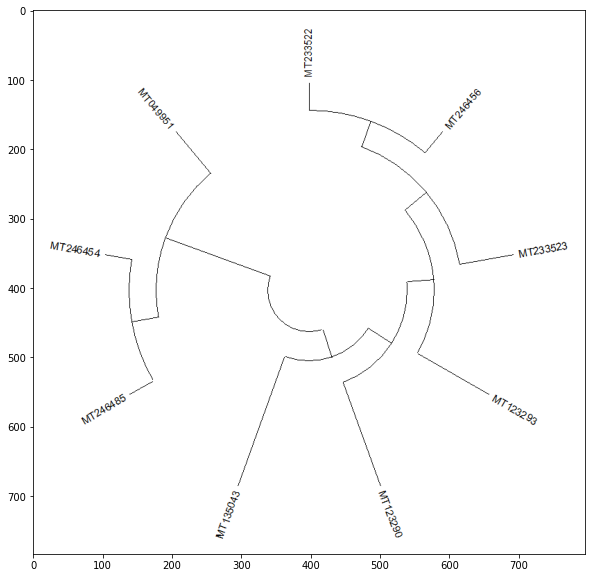

SARS_CoV_N_protein_protSeq_img


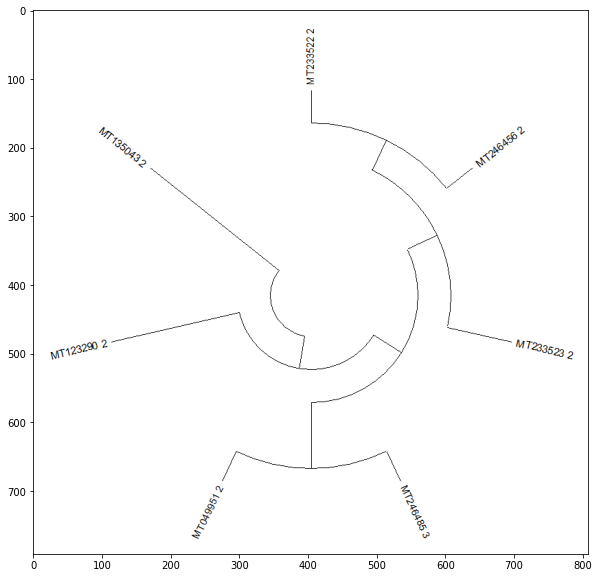

SARS_N_protein_cDNA_img


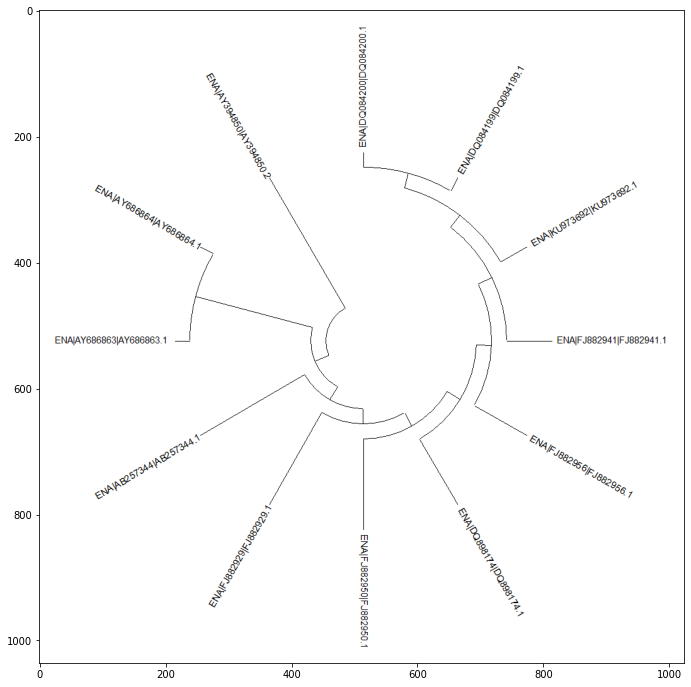

SARS_N_protein_protSeq_img


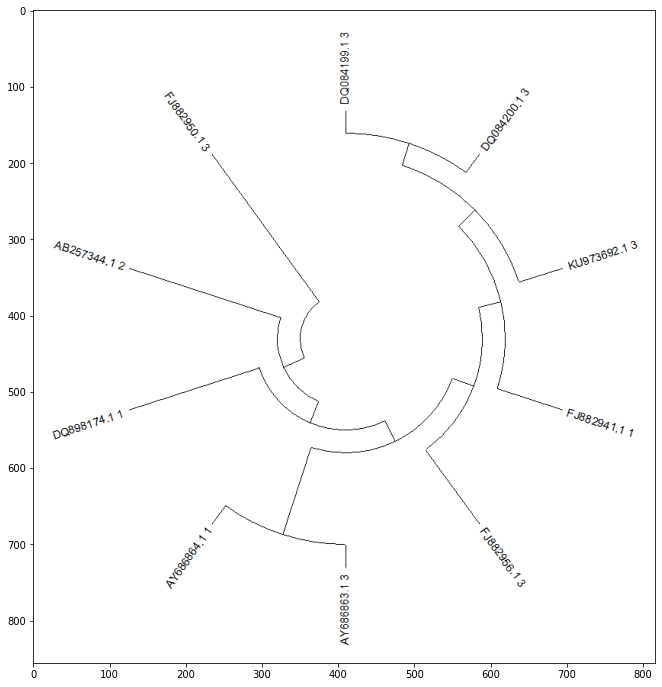

MERS_N_protein_protSeq_img


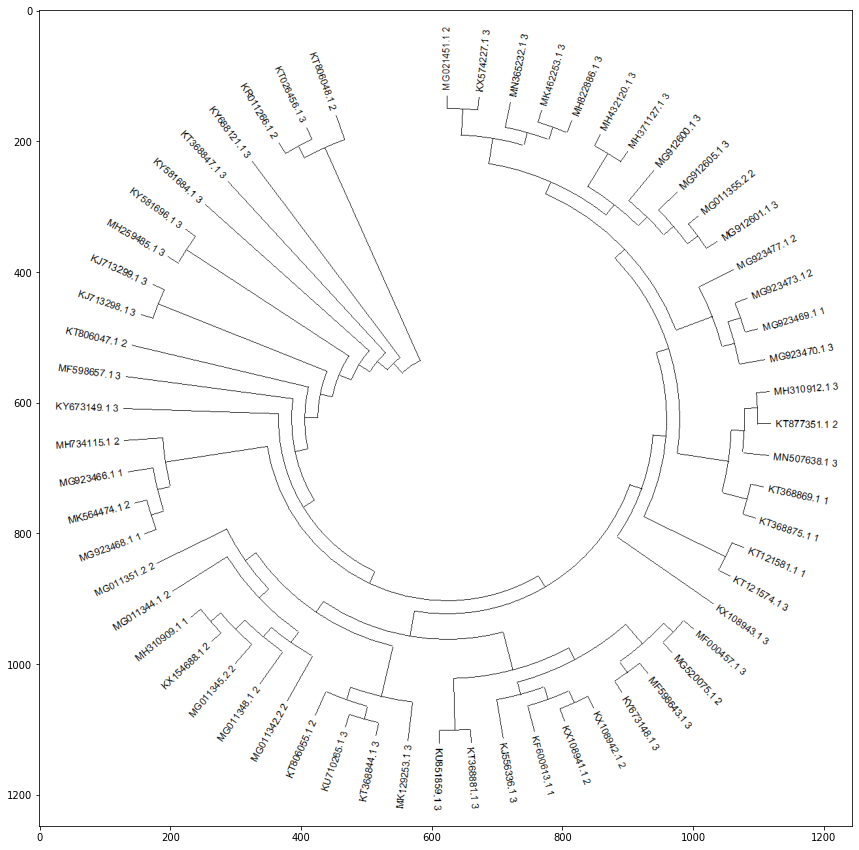

In [35]:
# Run ClustalX with 'representatives' datas and extract phylogeny tree. After then, MEGAX would show phylogeny tree.

import matplotlib.pyplot as plt
SARS_CoV_cDNA_img = plt.imread('SARS_CoV_cDNA_representatives.png')
SARS_CoV_protSeq_img = plt.imread('SARS_CoV_protSeq_representatives.png')
SARS_cDNA_img = plt.imread('SARS_cDNA_representatives.png')
SARS_protSeq_img = plt.imread('SARS_protSeq_representatives.png')
MERS_protSeq_img = plt.imread('MERS_protSeq_representatives.png')
print('SARS_CoV_N_protein_cDNA_img')
plt.figure(figsize=(10,10))
plt.imshow(SARS_CoV_cDNA_img)
plt.show()
print('SARS_CoV_N_protein_protSeq_img')
plt.figure(figsize=(10,10))
plt.imshow(SARS_CoV_protSeq_img)
plt.show()
print('SARS_N_protein_cDNA_img')
plt.figure(figsize=(12,12))
plt.imshow(SARS_cDNA_img)
plt.show()
print('SARS_N_protein_protSeq_img')
plt.figure(figsize=(12,12))
plt.imshow(SARS_protSeq_img)
plt.show()
print('MERS_N_protein_protSeq_img')
plt.figure(figsize=(15,15))
plt.imshow(MERS_protSeq_img)
plt.show()

In [36]:
# Q. How can you interpret those results? 
print('Regarding to above circular phylogeny trees, the arc represents a node. The sequences sharing the same node have similar relationship(high percentage of identity) with each others.')


Regarding to above circular phylogeny trees, the arc represents a node. The sequences sharing the same node have similar relationship(high percentage of identity) with each others.
